  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5

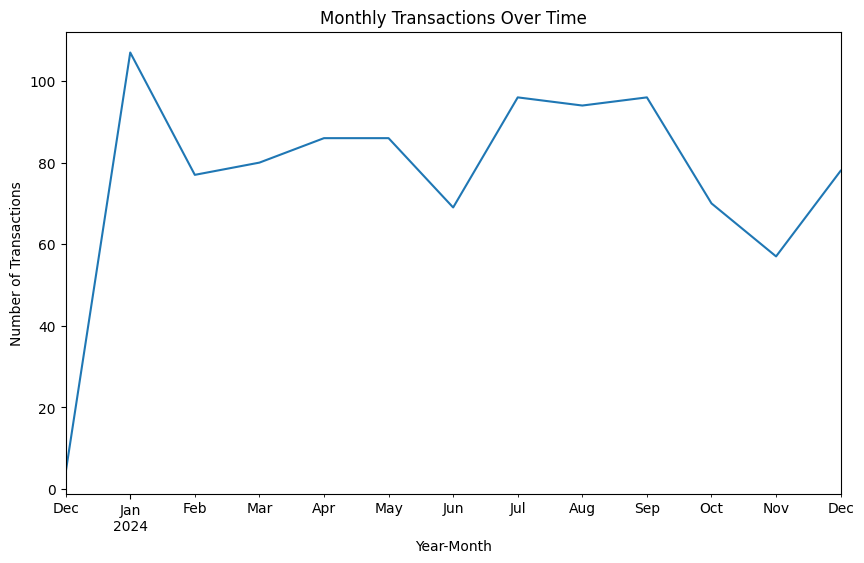

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


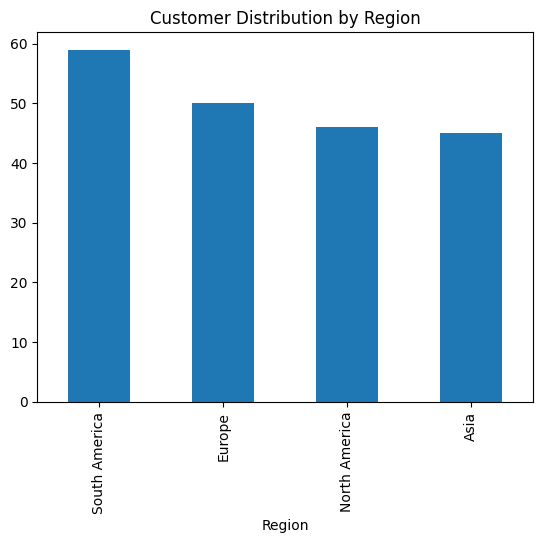

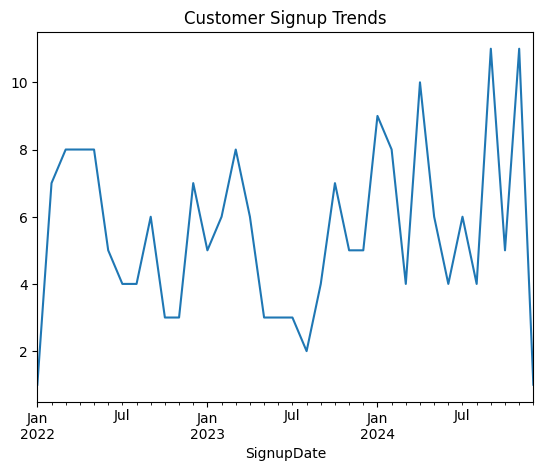

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   YearMonth        1000 non-null   period[M]     
 8   CustomerName     1000 non-null   object        
 9   Region           1000 non-null   object        
 10  SignupDate       1000 non-null   datetime64[ns]
 11  ProductName      1000 non-null   object        
 12  Category         1000 non-null   object        
 13  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1

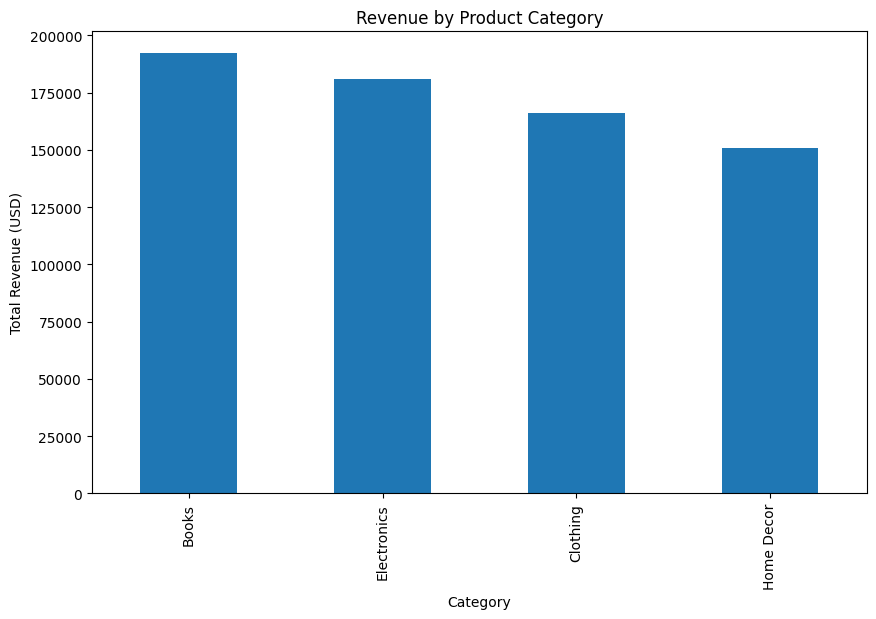

       Category            ProductName  Quantity
8         Books     SoundWave Cookbook        78
15     Clothing      ActiveWear Jacket        76
33  Electronics  ActiveWear Smartwatch       100
59   Home Decor    HomeSense Desk Lamp        81
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


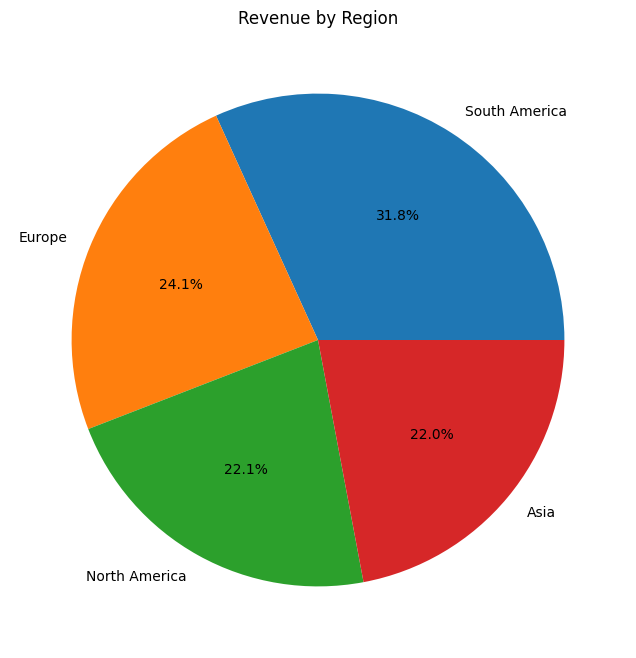

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


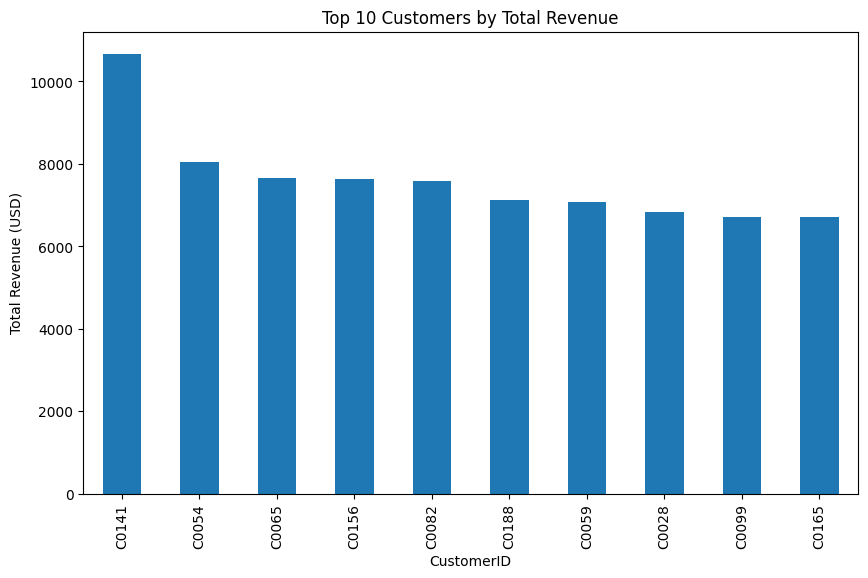

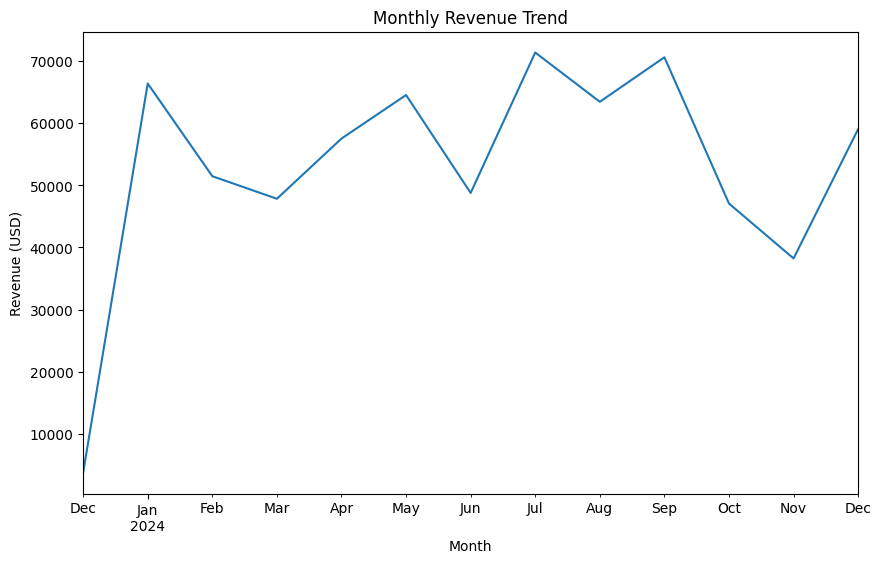

In [2]:
#load the csv files data

import pandas as pd
import matplotlib.pyplot as plt

customers=pd.read_csv("Customers.csv")
products=pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


#print the data

print(transactions.head())
print(transactions.info())
print(transactions.describe())

transactions ['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')

invalid_dates = transactions[pd.to_datetime(transactions['TransactionDate'], errors='coerce').isna()]
print(invalid_dates)

print(transactions['TransactionDate'].dtype)

#checking for duplicates
#for customers
print(customers.duplicated().sum())

print(customers['SignupDate'].min(),customers['SignupDate'].max())


#for products
print(products[products['Price'] < 0])


#for transactions
invalid_transactions = transactions[transactions['TotalValue']!=transactions['Quantity']* transactions['Price']]
print(invalid_transactions)



# Convert TransactionDate to datetime if not already done transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
# Group transactions by month/year
transactions ['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_counts = transactions['YearMonth'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,6))
transaction_counts.plot(kind='line' )
plt.title('Monthly Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.show()


# Analyze region distribution
region_counts = customers['Region'].value_counts()
print(region_counts)
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.show()

# Analyze signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
signup_trends.plot(kind='line', title='Customer Signup Trends')
plt.show()

# Merging datasets
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')

# Inspect the merged data
print(merged_data.info())
print(merged_data.head())

# Calculate total revenue by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

# Plot the revenue contribution by category
category_revenue.plot(kind='bar', figsize=(10, 6), title='Revenue by Product Category')
plt.ylabel('Total Revenue (USD)')
plt.show()

# Calculate the most sold product in each category
top_products = merged_data.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index()
top_products = top_products.sort_values(['Category', 'Quantity'], ascending=[True, False]).groupby('Category').head(1)
print(top_products)


# Revenue by region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_revenue)

# Plot region-wise revenue distribution
region_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Revenue by Region')
plt.ylabel('')
plt.show()

# Calculate customer lifetime value
customer_ltv = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_ltv.head(10))

# Plot top customers by total revenue
customer_ltv.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Customers by Total Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('CustomerID')
plt.show()


# Monthly revenue trends
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('TransactionMonth')['TotalValue'].sum()

# Plot monthly revenue trends
monthly_revenue.plot(kind='line', figsize=(10, 6), title='Monthly Revenue Trend')
plt.ylabel('Revenue (USD)')
plt.xlabel('Month')
plt.show()